
### Universidad del Valle de Guatemala <br>
### Security Data Science <br>
### Luis Pedro Cuéllar - 18220


# Proyecto 3 --> Ataques a modelos de Deep Learning 

In [1]:
import pandas as pd
import numpy as np 
import glob

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

if tf.executing_eagerly():
    tf.compat.v1.disable_eager_execution()

In [7]:
##  Instalación de la herramienta Adversarial Robustness ToolBox necesaria para el desarrollo del proyecto
!pip install adversarial-robustness-toolbox

You should consider upgrading via the '/Users/lpcuellar/Documents/UVG/2022-1/SDS/env/bin/python -m pip install --upgrade pip' command.


### MODELO ORIGINAL

#### Cargamos el dataset de imágenes

In [2]:
DATA_DIR = 'malimg_paper_dataset_imgs'

In [3]:
img_classes = []

for name in glob.glob(DATA_DIR + '/*'):
    img_class = name.split('/')[1]
    
    if '.txt' not in img_class:
        img_classes.append(img_class)
        print(img_class)
        
print("\nHay un total de {} clases\n".format(len(img_classes)))

Swizzor.gen!I
Instantaccess
Dialplatform.B
Autorun.K
Dontovo.A
C2LOP.gen!g
C2LOP.P
Lolyda.AA1
Lolyda.AT
Adialer.C
Fakerean
Rbot!gen
Allaple.A
VB.AT
Yuner.A
Malex.gen!J
Swizzor.gen!E
Agent.FYI
Skintrim.N
Obfuscator.AD
Lolyda.AA2
Lolyda.AA3
Wintrim.BX
Allaple.L
Alueron.gen!J

Hay un total de 25 clases



In [4]:
datagen = ImageDataGenerator().flow_from_directory(directory = DATA_DIR, target_size = (128, 128), batch_size=10000) 

Found 9339 images belonging to 25 classes.


In [5]:
datagen.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [6]:
images, label = next(datagen)

In [7]:
images.shape

(9339, 128, 128, 3)

In [8]:
label.shape

(9339, 25)

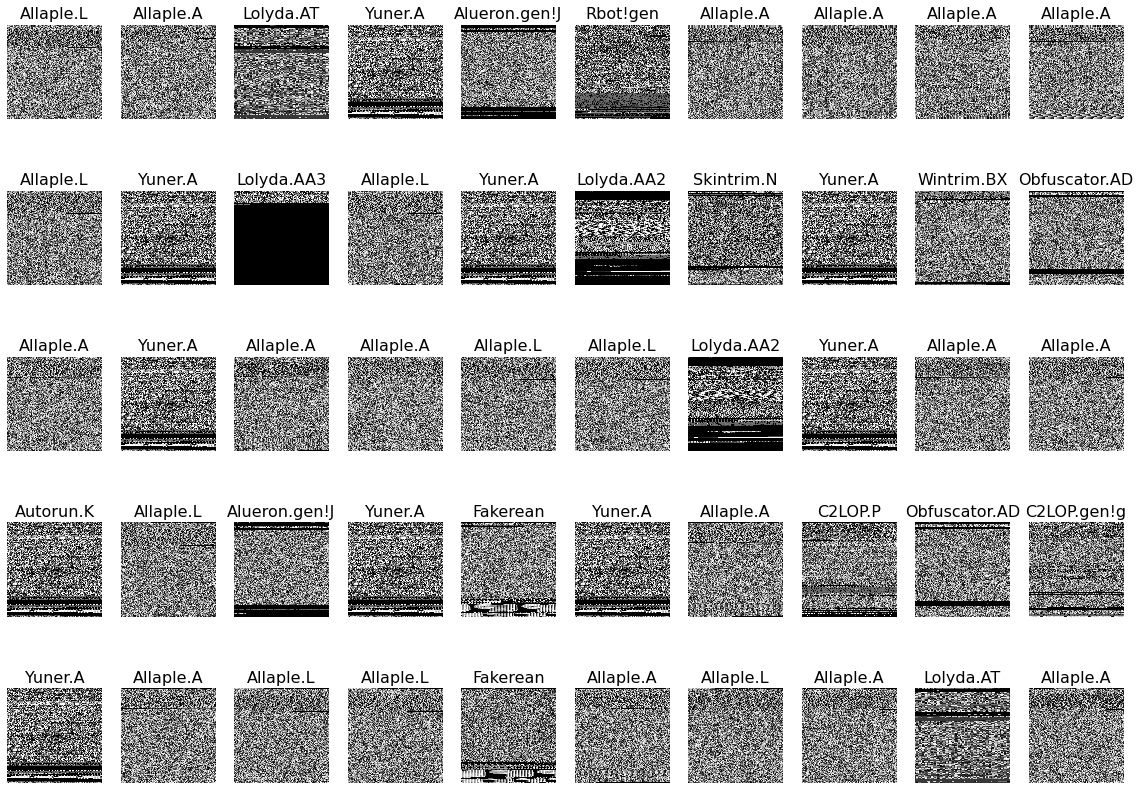

In [9]:
## Mostramos las imágenes que tiene el dataset

if type(images[0]) is np.ndarray:
    images = np.array(images).astype(np.uint8)
    
    if (images.shape[-1] != 3):
        images = images.transpose((0,2,3,1))

f = plt.figure(figsize=(20, 30))

cols = 10 

for i in range(0,50):
    sp = f.add_subplot(10, cols, i+1)
    sp.axis('Off')

    if label is not None:
        sp.set_title(list(datagen.class_indices.keys())[np.argmax(label[i])], fontsize=16)

    plt.imshow(images[i], interpolation=None if False else 'none')

#### Dividimos el dataset en dataset de entrenamiento y testeo

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images / 255., label, test_size = 0.3)

print("X_train --> ", X_train.shape)
print("y_train --> ", y_train.shape)
print("X_test --> ", X_test.shape)
print("y_test--> ", y_test.shape)

X_train -->  (6537, 128, 128, 3)
y_train -->  (6537, 25)
X_test -->  (2802, 128, 128, 3)
y_test-->  (2802, 25)


#### Hacemos la creación del modelo

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape

model = Sequential()

model.add(Conv2D(30, kernel_size=(3, 3),activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

#### Corremos el modelo

In [15]:
## Tuve que hacer cambios al modelo orginal ya que me dio problemas al generar el ataque

og_result = model.fit(X_train, y_train, epochs = 5)

Train on 6537 samples
Epoch 1/5


2022-05-30 14:07:07.386710: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6537/6537 [==============================] - 38s 6ms/sample - loss: 2.0087 - accuracy: 0.4144
Epoch 2/5
6537/6537 [==============================] - 36s 6ms/sample - loss: 1.0196 - accuracy: 0.6780
Epoch 3/5
6537/6537 [==============================] - 35s 5ms/sample - loss: 0.6443 - accuracy: 0.7874
Epoch 4/5
6537/6537 [==============================] - 35s 5ms/sample - loss: 0.3631 - accuracy: 0.8915
Epoch 5/5
6537/6537 [==============================] - 35s 5ms/sample - loss: 0.2245 - accuracy: 0.9287


#### Obtenemos las métricas del modelo

/Users/lpcuellar/Documents/UVG/2022-1/SDS/env/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy: 90.94


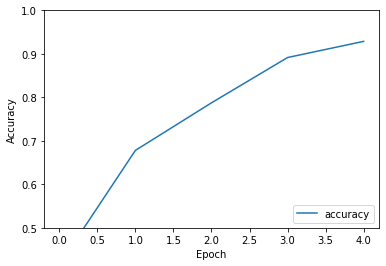

In [16]:
plt.plot(og_result.history['accuracy'], label='accuracy')
# plt.plot(og_result.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('Accuracy: %0.2f' %(test_acc*100))

In [17]:
print("Original model evaluation:")
print(model.evaluate(X_test, y_test))

Original model evaluation:
[0.24082439115734972, 0.90935045]


In [19]:
model.save("orignalModel.h5")

In [18]:
from art.estimators.classification import KerasClassifier
import tensorflow as tf

original_classifier = KerasClassifier(model, clip_values = (0, 1), use_logits = False)

/Users/lpcuellar/Documents/UVG/2022-1/SDS/env/lib/python3.8/site-packages/art/estimators/certification/__init__.py:12: UserWarning: PyTorch not found. Not importing DeepZ functionality
  warnings.warn("PyTorch not found. Not importing DeepZ functionality")


### ATAQUE DE EXTRACCIÓN

In [49]:
##  La mayor parte del ataque de extracción fue obtenido de uno de los notebooks de ejemplo en el repositorio de Adversarial Robustness Toolbox
##  https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/model-stealing-demo.ipynb

stolen_size = 5000
no_epochs = 5

x_test0 = X_test
y_test0 = y_test

img_shape = X_train[0].shape
img_shape

(128, 128, 3)

In [44]:
from art.attacks.extraction import CopycatCNN, KnockoffNets


attack_catalogue = {
    "COPYCAT": CopycatCNN(
        classifier = original_classifier,
        batch_size_fit = 64,
        batch_size_query = 64,
        nb_epochs = no_epochs, 
        nb_stolen = stolen_size,
        use_probability = True
    ),
    "KNOCKOFF": KnockoffNets(
        classifier = original_classifier,
        batch_size_fit = 64,
        batch_size_query = 64,
        nb_epochs = no_epochs, 
        nb_stolen = stolen_size,
        use_probability = True
    )
}

In [45]:
def build_model():
    model = Sequential()
    model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=img_shape))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(25, activation='softmax'))
    model.compile(loss= "categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

    return model

In [51]:
results = []

for stolen_size in [250, 500, 1000, 1500, 2000, 2500]:
    indices = np.random.permutation(len(x_test0))
    x_steal = x_test0[indices[:stolen_size]]
    y_steal = y_test0[indices[:stolen_size]]
    x_test = x_test0[indices[stolen_size:]]
    y_test = y_test0[indices[stolen_size:]]

    for name, attack in attack_catalogue.items():
        stolen_model = build_model()
        stolen_classifier = KerasClassifier(model = stolen_model, clip_values = (0, 1), use_logits = False)
        stolen_classifier = attack.extract(x_steal, y_steal, thieved_classifier = stolen_classifier)
        acc = stolen_classifier._model.evaluate(x_test, y_test)[1]
        
        print(name, ":", acc)

        results.append((name, stolen_size, acc))

Train on 250 samples
Epoch 1/5
250/250 [==============================] - 3s 11ms/sample - loss: 2.6440 - accuracy: 0.2600
Epoch 2/5
250/250 [==============================] - 2s 9ms/sample - loss: 2.3571 - accuracy: 0.3360
Epoch 3/5
250/250 [==============================] - 2s 9ms/sample - loss: 2.3173 - accuracy: 0.4080
Epoch 4/5
250/250 [==============================] - 2s 9ms/sample - loss: 2.1836 - accuracy: 0.3840
Epoch 5/5
250/250 [==============================] - 2s 9ms/sample - loss: 2.3152 - accuracy: 0.3160
COPYCAT : 0.31896552
KNOCKOFF : 0.39576802
Train on 500 samples
Epoch 1/5
500/500 [==============================] - 4s 9ms/sample - loss: 2.6696 - accuracy: 0.2500
Epoch 2/5
500/500 [==============================] - 4s 9ms/sample - loss: 2.5137 - accuracy: 0.2840
Epoch 3/5
500/500 [==============================] - 4s 9ms/sample - loss: 2.3345 - accuracy: 0.3100
Epoch 4/5
500/500 [==============================] - 4s 9ms/sample - loss: 2.2333 - accuracy: 0.3420
Epoch

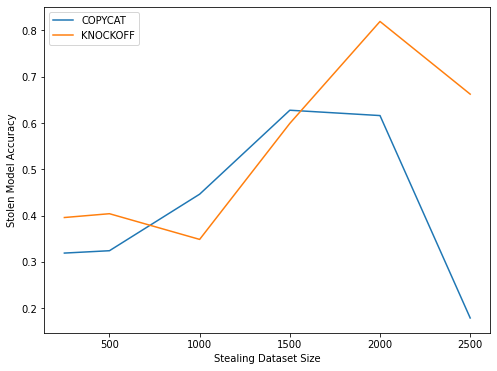

In [57]:
stolen_df = pd.DataFrame(results, columns=('Method Name', 'Stealing Dataset Size', 'Accuracy'))

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")

for name, group in stolen_df.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)

plt.show()

#### Capa protegida

In [76]:
from art.defences.postprocessor import ReverseSigmoid
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape

postprocessor = ReverseSigmoid(beta=1.0, gamma=0.2)
classifier_protected = KerasClassifier(model, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

In [77]:
from art.attacks.extraction import CopycatCNN, KnockoffNets


protected_attack_catalogue = {
    "COPYCAT (vs. PROTECTED)": CopycatCNN(
        classifier = classifier_protected,
        batch_size_fit = 64,
        batch_size_query = 64,
        nb_epochs = no_epochs, 
        nb_stolen = stolen_size,
        use_probability = True
    ),
    "KNOCKOFF (vs. PROTECTED)": KnockoffNets(
        classifier = classifier_protected,
        batch_size_fit = 64,
        batch_size_query = 64,
        nb_epochs = no_epochs, 
        nb_stolen = stolen_size,
        use_probability = True
    )
}

In [78]:
protected_results = []

for stolen_size in [250, 500, 1000, 1500, 2000, 2500]:
    indices = np.random.permutation(len(x_test0))
    x_steal = x_test0[indices[:stolen_size]]
    y_steal = y_test0[indices[:stolen_size]]
    x_test = x_test0[indices[stolen_size:]]
    y_test = y_test0[indices[stolen_size:]]

    for name, attack in protected_attack_catalogue.items():
        stolen_model = build_model()
        stolen_protected_classifier = KerasClassifier(model = stolen_model, clip_values = (0, 1), use_logits = False)
        stolen_protected_classifier = attack.extract(x_steal, y_steal, thieved_classifier = stolen_protected_classifier)
        acc = stolen_protected_classifier._model.evaluate(x_test, y_test)[1]
        
        print(name, ":", acc)

        protected_results.append((name, stolen_size, acc))

Train on 250 samples
Epoch 1/5
250/250 [==============================] - 3s 11ms/sample - loss: 3.2280 - accuracy: 0.0520
Epoch 2/5
250/250 [==============================] - 2s 10ms/sample - loss: 3.2184 - accuracy: 0.1280
Epoch 3/5
250/250 [==============================] - 2s 9ms/sample - loss: 3.2174 - accuracy: 0.2320
Epoch 4/5
250/250 [==============================] - 2s 9ms/sample - loss: 3.2169 - accuracy: 0.2440
Epoch 5/5
250/250 [==============================] - 2s 8ms/sample - loss: 3.2165 - accuracy: 0.3520


/Users/lpcuellar/Documents/UVG/2022-1/SDS/env/lib/python3.8/site-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


COPYCAT (vs. PROTECTED) : 0.32249215
KNOCKOFF (vs. PROTECTED) : 0.30838558
Train on 500 samples
Epoch 1/5
500/500 [==============================] - 4s 9ms/sample - loss: 3.2251 - accuracy: 0.2040
Epoch 2/5
500/500 [==============================] - 4s 8ms/sample - loss: 3.2169 - accuracy: 0.3280
Epoch 3/5
500/500 [==============================] - 4s 9ms/sample - loss: 3.2161 - accuracy: 0.3260
Epoch 4/5
500/500 [==============================] - 4s 9ms/sample - loss: 3.2155 - accuracy: 0.3460
Epoch 5/5
500/500 [==============================] - 4s 9ms/sample - loss: 3.2152 - accuracy: 0.3600
COPYCAT (vs. PROTECTED) : 0.36403129
KNOCKOFF (vs. PROTECTED) : 0.25412685
Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 9s 9ms/sample - loss: 3.2193 - accuracy: 0.1020
Epoch 2/5
1000/1000 [==============================] - 9s 9ms/sample - loss: 3.2157 - accuracy: 0.2970
Epoch 3/5
1000/1000 [==============================] - 9s 9ms/sample - loss: 3.2151 - accuracy: 

In [79]:
protected_df = pd.DataFrame(protected_results, columns=['Method Name', 'Stealing Dataset Size', "Accuracy"])
protected_df.head()

,Method Name,Stealing Dataset Size,Accuracy
0,COPYCAT (vs. PROTECTED),250,0.322492
1,KNOCKOFF (vs. PROTECTED),250,0.308386
2,COPYCAT (vs. PROTECTED),500,0.364031
3,KNOCKOFF (vs. PROTECTED),500,0.254127
4,COPYCAT (vs. PROTECTED),1000,0.379023


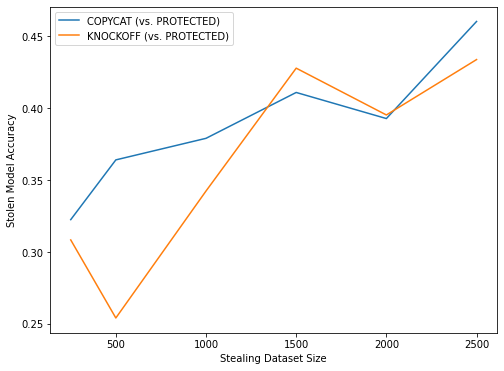

In [80]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")

for name, group in protected_df.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)

plt.show()

In [82]:
##  CopyCat vs KnockOff

df_combined = pd.concat([stolen_df, protected_df])
groupby = df_combined.groupby("Method Name")

/var/folders/kh/vcfbrgzs4d34zw7_9vlbmc780000gn/T/ipykernel_15350/258018610.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/kh/vcfbrgzs4d34zw7_9vlbmc780000gn/T/ipykernel_15350/258018610.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


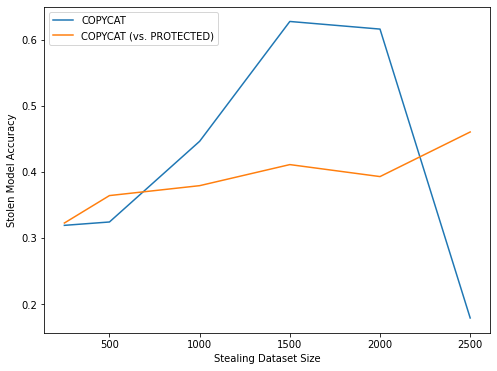

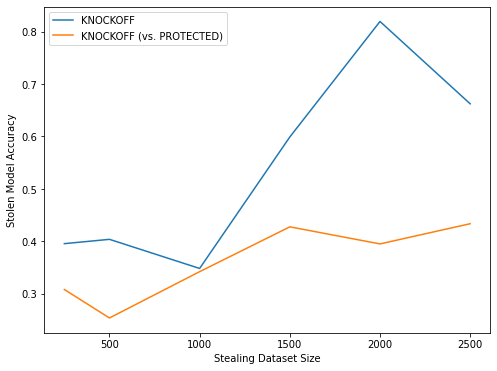

In [83]:
names = ["COPYCAT", "KNOCKOFF"]

for name in names:
    fig, ax = plt.subplots(figsize=(8,6))

    groupby.get_group(name).plot(1,2,ax=ax, label=name)
    groupby.get_group(name + " (vs. PROTECTED)").plot(1,2,ax=ax, label= name + " (vs. PROTECTED)")

    ax.set_xlabel("Stealing Dataset Size")
    ax.set_ylabel("Stolen Model Accuracy")

    fig.show()

#### DISCUSIÓN

En general los resultados son los esperados. Cuando el modelo no estaba protegido, podemos ver que el acurracy del modelo fue mucho mayor a comparación de cuando ya lo habíamos protegido. Esta es una buena forma, no tan trivial, en la que podemos hacer que nuestro modelo sea más resiliente a ataques de caja negra.

<br>

Bastante contento con los resultados, cuando no estaba protegido el modelo llegaba a tener más de un 60% de presición. Cuando comparamos el mismo tipo de ataque con las mismas observaciones utilizadas, podemos ver que la diferente es bastante notable. Cuando el modelo ya estaba protegido, en algunos casos este nunca pasó del 50%.

### ATAQUE DE EVASIÓN

#### Generamos observaciones falsas

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images / 255., label, test_size = 0.3)

print("X_train --> ", X_train.shape)
print("y_train --> ", y_train.shape)
print("X_test --> ", X_test.shape)
print("y_test--> ", y_test.shape)

X_train -->  (6537, 128, 128, 3)
y_train -->  (6537, 25)
X_test -->  (2802, 128, 128, 3)
y_test-->  (2802, 25)


In [104]:
from art.attacks.evasion import FastGradientMethod

attack = FastGradientMethod(estimator = original_classifier, eps = 75)

X_train_ev = attack.generate(X_train)
X_test_ev = attack.generate(X_test)

#### Usamos el modelo original para predecir y obtener el accuracy con estas observaciones falsas 

In [102]:
## concatenamos el train generado con el que ya teníamos previamente

X_train = np.append(X_train, X_train_ev, axis = 0)
y_train = np.append(y_train, y_train, axis = 0)

In [103]:
original_classifier.fit(X_train, y_train, batch_size = 64, nb_epochs=no_epochs)

Train on 13074 samples
Epoch 1/5
13074/13074 [==============================] - 60s 5ms/sample - loss: 1.2121 - accuracy: 0.7257
Epoch 2/5
13074/13074 [==============================] - 65s 5ms/sample - loss: 0.3460 - accuracy: 0.9079
Epoch 3/5
13074/13074 [==============================] - 63s 5ms/sample - loss: 0.2147 - accuracy: 0.9385
Epoch 4/5
13074/13074 [==============================] - 63s 5ms/sample - loss: 0.1645 - accuracy: 0.9518
Epoch 5/5
13074/13074 [==============================] - 66s 5ms/sample - loss: 0.1351 - accuracy: 0.9582


In [106]:
evasion_predictions = original_classifier.predict(X_test_ev)

In [110]:
accuracy = np.sum(np.argmax(evasion_predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on evasion test examples: {}%".format(accuracy * 100))

correct_predictions = np.sum(np.argmax(evasion_predictions, axis = 1) == np.argmax(y_test, axis = 1))
print("Correct predictions: {}".format(correct_predictions))


Accuracy on evasion test examples: 0.39257673090649536%
Correct predictions: 11


#### Modidficaciones al Modelo

In [108]:
from art.defences.detector.evasion import BinaryInputDetector

defence = BinaryInputDetector(original_classifier)

In [109]:
defence.fit(X_train, y_train, batch_size = 64, nb_epochs=no_epochs)

Train on 13074 samples
Epoch 1/5
13074/13074 [==============================] - 55s 4ms/sample - loss: 0.1130 - accuracy: 0.9654
Epoch 2/5
13074/13074 [==============================] - 56s 4ms/sample - loss: 0.0990 - accuracy: 0.9708
Epoch 3/5
13074/13074 [==============================] - 62s 5ms/sample - loss: 0.0884 - accuracy: 0.9754
Epoch 4/5
13074/13074 [==============================] - 62s 5ms/sample - loss: 0.0747 - accuracy: 0.9791
Epoch 5/5
13074/13074 [==============================] - 62s 5ms/sample - loss: 0.0686 - accuracy: 0.9816


In [112]:
defence_predictions = defence.predict(X_test_ev)

In [113]:
accuracy = np.sum(np.argmax(defence_predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on evasion test examples: {}%".format(accuracy * 100))

correct_predictions = np.sum(np.argmax(defence_predictions, axis = 1) == np.argmax(y_test, axis = 1))
print("Correct predictions: {}".format(correct_predictions))


Accuracy on evasion test examples: 1.177730192719486%
Correct predictions: 33


#### DISCUSIÓN

Cuando se comparan las dos corridas, con y sin la defensa, podemos observar una gran mejoría en la cantidad de predicciones correctas. Sin la defensa se obtuvo un resultado de 11 predicciones correctas, mientras que al aplicarle una defensa se tuvo un resultado de 33 predicciones correctas.

<br>
<br>

La defensa utilizada "Binary Input Detector" lo que hace, a grandes razgos, es detectar si las observaciones proporcionadas al modelo o al clasificador están "limpias" o provienen de un ataque de adversario. 